# Introduction to Artificial Neural Networks

Birds inspired us to fly, burdock plants inspired velcro, & nature has inspired countless more inventions. It seems only logical then, to look at the brain's architecture for inspiration on how to build an intelligent machine. This is the logic that sparked *artificial neural networks* (ANNs): an ANN is a machine learning model inspired by the networks of biological neurons found in our brains. However, although planes were inspired by birds, they don't flap their wings. Similarly, ANNs have gradually become quite different from their biological cousins. Some researchers even argue that we should drop the biological analogy altogether (e.g., by saying "units" rather than "neurons"), lest we restrict our creativity to biologically plausible systems.

ANNs are at the very core of deep learning. They are versatile, powerful, & scalable, making them ideal to tackle large & highly complex machine learning tasks such as classifying billions of images (e.g., Google images), powering speech recognition services (e.g., Apple's siri), recommending the best videos to watch to hundred of millions of users every day (e.g., Youtube), or learning to beat the world champion at the game of Go (DeepMind's AlphaGo).

The first part of this lesson introduces artificial neural networks, starting with a quick tour of the very first ANN architectures & leading up to *Multilayer Perceptrons* (MLP), which are heavily used today. In the second part, we will look at how to implement neural networks using the popular Keras API. This is a beautifully designed & simple high-level API for building, training, evaluating, & running neural networks. But don't be fooled by its simplicity: it is expressive & flexible enough to let you build a wide variety of neural network architectures. In fact, it will probably be sufficient for most of your use cases. & should you ever need extra flexibility, you can always write custom Keras components, using its lower-level API.

But first, let's go back in time to see how artificial neural networks came to be.

---

# From Biological to Artificial Neurons

Surprisingly, ANNs have been around for a while: they were first introduced back in 1943 by the neurophysiologist Warren McCulloch & mathematician Walter Pitts. In their landmark paper, "A Logical Calculus of Ideas Immanent in Nervous Activity", McCulloch & Pitts presented a simplified computational model of how biological neurons might work together in animal brains to perform complex computations using *propositional logic*. This was the first artificial neural network architecture. Since then, many other architectures have been invented.

The early successes of ANNs led to the widespread belief that we would soon be conversing with truly intelligent machines. When it became clear in the 1960s that this promise would go unfulfilled (at least for quite a while), funding flew elsewhere, & ANNs entered a long winter. In the early 1980s, new architectures were invented & better training techniques were developed, sparking a revival of interest in *connectionism* (the study of neural networks). But progress was slow, & by the 1990s other power machine learning techniques were invented, such as support vector machines. These techniques seemed to offer better results & stronger theoretical foundations than ANNs, so once again the study of neural networks was put on hold.

We are now witnessing yet another wave of interest in ANNs. Will this wave die out like the previous ones did? Well, here are a few good reasons to believe that this time is different & that the renewed interest in ANNs will have a much more profound impact on our lives:

* There are now a huge quantity of data available to train neural networks, & ANNs frequently outperform other ML techniques on very large & complex problems.
* The tremendous increase in computing power since the 1990s now makes it possible to train large neural networks in a reasonable amount of time. This is in part due to Moore's law (the number of components in integrated circutes has doubled about every 2 years over the last 50 years), but also thanks to the gaming industry, which has stimulated the production of powerful GPU cards by the millions. Moreover, cloud platforms have made this power accessible to everyone.
* The training algorithms have improved. To be fair, they are only slightly different from the ones used in the 1990s, but these relatively small tweaks have had a huge positive impact.
* Some theoretical limitations of ANNs have turned out to be benign in practice. For example, many people thought that ANN training algorithms were doomed because they were likely to get stuck in local optima, but it turns out that this is rather rare in practice (& when it is the case, they are usually fairly close to the global optimum).
* ANNs seem to have entered a virtuous circle of funding & progress. Amazing products based on ANNs regularly make the headline news, which pull more & more attention & funding towards them, resulting in more & more progress & even more amazing products.

## Biological Neurons

Before discussing artifical neurons, let's take a quick look at a biological neuron.

<img src = "Images/Biological Neuron.png" width = "600" style = "margin:auto"/>

It is an unusual-looking cell mostly found in animal brains. It's composed of a *cell body* containing a nucleus & most of the cell's complex components, many branching extensions called *dendrites*, plus one very long extension called *axon*. The axon's length may be just a few times longer than the cell body, or up to tens of thousands of times longer. Near its extremity, the axon splits off into many branches called *telochondria*, & at the tip of these branches are minuscule strutures called *synaptic terminals* (or simply *synapses*), which are connected to the dendrites or cell bodies of other neurons. Biological neurons produce short electrical impulses called *action potentials* (APs, or just *signals*) which travel along the axons & make the synapses releases chemical signals called *neurotransmitters*. When a neuron receives a sufficient amount of these neurotransmitters within a few milliseconds, it fires its own electrical impulses (actually, it depends on the neurotransmitters, as some of them inhibit the neuron from firing).

Thus, individual biological neurons seem to behave in a rather simple way, but they are organised in a vast network of billions, with each neuron typically connected to thousands of other neurons. Highly complex computations can be performed by a network of fairly simple neurons, much like a complex anthill can emerge from the combined efforts of simple ants. The architecture of biological neural networks (BNNs) is still the subject of active research, but some parts of the brain have been mapped, & it seems that neurons are often organised in consecutive layers, especially in the cerebral cortex (i.e., the outer layer of your brain), as shown below.

<img src = "Images/Layers of Biological Neurons.png" width = "600" style = "margin:auto"/>

## Logical Computations with Neurons

McCulloch & Pitts proposed a very simple model of the biological neuron, which later became known as an *artificial neuron*: it has one or more binary (on/off) inputs & one binary output. The artificial neuron activates its output when more than a certain number of its inputs are active. In their paper, they showed that even with such a simplified model, it is possible to build a network of artificial neurons that computes any logical proposition you want. To see how such a network works, let's build a few ANNs that perform various logical computations, assuming that a neuron is activated when at least two of its inputs are active.

<img src = "Images/ANNs.png" width = "500" style = "margin:auto">

Let's see what these networks do:

* The first network on the left is the identity function: if neuron A is activated, then neuron C gets activated as well (since it receives two inputs signals from neuron A); but if neuron A is off, then neuron C is off as well.
* The second network performs a logical AND: neuron C is activated only when both neuron A & B are activated as well (since it takes 2 input signals for neuron C to activate); but if neuron A is off, then neuron C is off as well.
* The third network performs a logical OR: neuron C gets activated if either neuron A or neuron B is activated (or both).
* Finally, if we suppose that an input connection can inhibit the neuron's activity (which is the case with biological neurons), then the fourth network computes a slightly more complex logical proposition: neuron C is activated only if neuron A is active & neuron B is off. If neuron A is active all the time, then you get a logical NOT: neuron C is active when neuron B is off, & vice versa. 

You can imagine how these networks can be combined to compute complex logical expressions.

## The Perceptron

The *Perceptron* is one of the simplest ANN architectures, invented in 1957 by Frank Rosenblatt. It is based on a slightly different artificial neuron called a *threshold logic unit* (TLU), or sometimes a *linear threshold unit* (LTU). 

<img src = "Images/Threshold Logic Unit.png" width = "450" style = "margin:auto"/>

The inputs & outputs are numbers (instead of binary on/off values), & each input connection is associated with a weight. The TLU computes a weighted sum of its inputs ($z = w_1x_1 + w_2x_2 + ... + w_nx_n = x^Tw$), then applies a *step function* to that sum & outputs the result: $h_w(x) = step(z)$, where $z = x^Tw$.

The most common step function used in perceptrons is the Heaviside step function. Sometimes the sign function is used instead.

$$heaviside\ (z) = \bigg\{\begin{split}
0\ if\ z < 0 \\
1\ if\ z \geq 0
\end{split} \quad sgn\ (z) = \Biggl\{\begin{split}
-1\ if\ z < 0 \\
0\ if\ z = 0 \\
+1\ if\ z > 0
\end{split}$$

A single TLU can be used for simple linear binary classification. It computes a linear combination of inputs, & if the result exceeds a threshold, it outputs the positive class. Otherwise it outputs the negative class (just like a logistic regression or linear SVM classifier). You could, for example, use a single TLU to classify iris flowers based on petal length & width (also adding an extra bias feature $x_0 = 1$, just like we did in previous lessons). Training a TLU in this case means finding the right values for $w_0$, $w_1$, & $w_2$.

A perceptron is simply composed of a single layer of TLUs, with each TLU connected to all the inputs. When all the neurons in a layer are connected to every neuron in the previous layer (i.e., its input neurons), the layer is called a *fully connected layer*, or a *dense layer*. The inputs of the perceptron are fed to special passthrough neurons called *input neurons*: they output whatever input they are fed. All the input neurons form the *input layer*. Moreover, an extra bias feature is generally added ($x_0 = 1$): it is typically represented using a special type of neuron called a *bias neuron*, which outputs 1 all the time. A perceptron with two inputs & three outputs is represented below. This perceptron can classify instances simultaneously into three different binary classes, which makes it a multioutput classifier.

<img src = "Images/Architecture of Perceptron.png" width = "500" style = "margin:auto"/>

Thanks to the magic of linear algebra, it is possible to efficiently compute the outputs of a layer of artificial neurons for several instances at once.

$$h_{W,b}(X) = \phi(XW + b)$$

In this equation:

* As always, $X$ represents the matrix of input features. It has one row per instance & one column per feature.
* The weight matrix $W$ contains all the connection weights except for the ones from the bias neuron. It has one row per input neuron & one column per artificial neuron in the layer.
* The bias vector $b$ contains all the connection weights between the bias neuron & the artificial neurons. It has one bias term per artificial neuron.
* The function $\phi$ is called the *activation function*: when the artificial neurons are TLUs, it is a step function.

So how is a perceptron trained? The perceptron training algorithm proposed by Rosenblatt was largely inspired by *Hebb's rule*. In his 1949 book, *The Organisation of Behaviour*, Donald Hebb suggested that when a biological neuron triggers another neuron often, the connection between these two neurons grows stronger. Siegrid Lowel later summarised Hebb's idea in the catchy phrase, "Cells that fire together, wire together"; that is, the connection weight between two neurons tends to increase when they fire simultaneously. This rule later became known as Hebb's rule (or *Hebbian learning*). Perceptrons are trained using a variant of this rule that takes into account the error made by the network when it makes a prediction; the perceptron learning rule reinforces connections that help reduce the error. More specifically, the perceptron is fed one training instance at a time, & for each instance it makes its predictions. For every output neuron that produced a wrong prediction, it reinforces the connection weights from the inputs that would have contributed to the correct prediction. The rule is shown here.

$${w_{i, j}}^{(next\ step)} = w_{i, j} + \eta(y_j - \hat{y}_j)x_i$$

In this equation:

* $w_{i, j}$ is the connection weight between the $i^{th}$ input neuron & the $j^{th}$ output neuron.
* $x_i$ is the $i^{th}$ input value of the current training instance.
* $\hat{y}_j$ is the output of the $j^{th}$ output neuron for the current training instance.
* $y_j$ is the target output of the $j^{th}$ output neuron for the current training instance.
* $\eta$ is the learning rate.

The decision boundary of each output neuron is linear, so perceptrons are incapable of learning complex patterns (just like logistic regression classifiers). However, if the training instances are linearly separable, Rosenblatt demonstrated that this algorithm would converge to a solution. This is called the *perceptron convergence theorem*.

Scikit-learn provides a `Perceptron` class that implements a single-TLU network. It can be used pretty much as you would expect -- for example, on the iris dataset:

In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)] # Petal length & width
y = (iris.target == 0).astype(np.int32)

perceptron_classifier = Perceptron()
perceptron_classifier.fit(X, y)

y_pred = perceptron_classifier.predict([[2, 0.5]])

You may have noticed that the perceptron learning algoritm strongly resembles stochastic gradient descent. In fact, scikit-learn's `Perceptron` class is equivalent to using an `SGDClassifier` with the following hyperparameters: `loss = "perceptron"`, `learning_rate = "constant"`, `eta0 = 1` (the learning rate), & `penalty = None` (no regularisation).

Note that contrary to the logistic regression classifier, perceptrons do not output a class probability; rather, they make predictions based on a hard threshold. This is one reason to prefer logistic regression over perceptrons.

In their 1969 monograph *perceptrons*, Marvin Minsky & Seymour Papert highlighted a number of serious weaknesses of perceptrons -- in particular, the fact that they are incapable of solving some trivial problems (e.g., the *exclusive OR* (XOR) classification problem, see left side of below figure). This is true of any other linear classification model (such as logistic regression classifiers), but researchers had expected much more from perceptron, & some were so disappointed that they dropped neural networks altogether in favor of higher-level problems such as logic, problem solving, & search.

It turns out that some of the limitations of perceptrons can be eliminated by stacking multiple perceptrons. The resulting ANN is called a *multilayer perceptron* (MLP). A MLP can solve the XOR problem, as you can verify by computing the output of the MLP represented on the right side of the below figure: with inputs (0, 0) or (1, 1), the network outputs 0, & with inputs (0, 1) or (1, 0), it outputs 1. All connections have a weight equal to 1, except the four connections where the weight is shown. 

<img src = "Images/MLP Solves XOR Classification Problem.png" width = "500" style = "margin:auto"/>

## The Multilayer Perceptron & Backpropagation

An MLP is composed of one (passthrough) *input layer*, one or more layers of TLUs, called *hidden layers*, & one final layer of TLUs called the *output layer*. The layers close to the input layer are usually called the *lower layers*, & the ones close to the outputs are usually called the *upper layers*. Every layer except the output layer includes a bias neuron & is fully connected to the next layer.

<img src = "Images/Architecture of Multilayer Perceptron.png" width = "500" style = "margin:auto"/>

When an ANN contains a deep stack of hidden layers, it is called a *deep neural network* (DNN). The field of deep learning studies DNNs, & more generally models containing deep stacks of computations. Even so, many people talk about deep learning whenever neural networks are involved (even shallow ones).

For many years, researchers struggled to find a way to train MLPs, without success. But in 1986, David Rumelhard, Geoffrey Hinton, & Ronald Williams published a groundbreaking paper that introduced the *backpropagation* training algorithm, which is still used today. In short, it is gradient descent using an efficient technique for computing the gradients automatically: in just two passes through the network (one forward, one backward), the backpropagation algorithm is able to compute the gradient of the network's error with regard to every single model parameter. In other words, it can find out how each connection weight & each bias term should be tweaked in order to reduce the error. Once it has these gradients, it just performs a regular gradient descent step, & the whole process is repeated until the network converges to the solution.

Let's run through this algorithm in a bit more detail:

* It handles one mini-batch at a time (for example, containing 32 instances each), & it goes through the full training set multiple times. Each pass is called an *epoch*.
* Each mini-batch is passed to the network's input layer, which sends it to the first hidden layer. The algorithm then computes the output of all the neurons in this layer (for every instance in the mini-batch). The result is passed on to the next layer, its output is computed & passed on the next layer, & so on until we get the output of the last layer, the output layer. This is the *forward pass*: it is exactly like making predictions, except all intermediate results are preserved since they are needed for the backward pass.
* Next, the algorithm measures the network's output error (i.e., it uses a loss function that compares the desired output & the actual output of the network, & returns some measure of the error).
* Then it computes how much each output connection contributed to the error. This is done analytically by applying the *chain rule* (perhaps the most fundamental rule in calculus), which makes this step fast & precise.
* The algorithm then measures how much of these error contributions came from each connection in the layer below, again using the chain rule, working backward until the algorithm reaches the input layer. As explained earlier, this reverse pass efficiently measures the error gradient across all the connection weights in the network by propagating the error gradient backward through the network (hence the name of the algorithm).
* Finally, the algorithm performs a gradient descent step to tweak all the connection weights in the network, using the error gradients it just computed.

This algorithm is so important that it's worth summarising it again: for each training instance, the backpropagation algorithm first makes a prediction (forward pass) & measures the error, then goes through each layer in reverse to measure the error contribution from each connection (reverse pass), & finally tweaks the connection weights to reduce the error (gradient descent step).

In order for this algorithm to work properly, its authors made a key change to the MLP's architecture: they replaced the step function with the logistic (sigmoid) function $\sigma(z) = 1/(1 + e^{-z})$. This was essential because the step function contains only flat segments, so there is no gradient to work with (gradient descent cannot move on a flat surface), while the logistic function has a well-defined nonzero derivative everywhere, allowing gradient descent to make some progress at every step. In fact, the backpropagation algorithm works well with many other activation functions, not just the logistic function. Here are two other popular choices:

* *The hyperbolic tangent function: $tanh(z) = 2\sigma(2z) - 1$*
   * Just like the logistic function, this activation function is S-shaped, continuous, & differentiable, but its output value ranges from -1 to 1 (instead of 0 to 1 in the case of the logistic function). That range tends to make each layer's output more or less centered around 0 at the beginning of training, which often helps speed up convergence.
* *The rectified linear unit function: $ReLU(z) = max(0, z)$*
   * The ReLu function is continuous but unfortunately not differentiable at $z = 0$ (the slope changes abruptly, which can make gradient descent bounce around), & its derivative is 0 for $z < 0$. In practice, however, it works very well & has the advantage of being fast to compute, so it has become the default. Most importantly, the fact that it does not have a maximum output value helps reduce some issues during gradient descent.
   
These popular activation functions & their derivatives are represented below. But wait! Why do we need activation functions in the first place? Well, if you chain several linear transformations, all you get is a linear transformation. For example if $f(x) = 2x + 3$ & $g(x) = 5x - 1$, then chaining these two linear functions gives you another linear function: $f(g(x)) = 2(5x - 1) + 3 = 10x + 1$. So if you don't have some nonlinearity between layers, then even a deep stack of layers is equivalent to a single layer, & you can't solve very complex problems with that. Conversely, a large enough DNN with nonlinear activations can theoretically approximate any continuous function.

<img src = "Images/Activation Functions & Their Derivatives.png" width = "600" style = "margin:auto"/>

Ok. You know where neural nets came from, what their architecture is, & how to compute their outputs. You've also learned about the backpropagation algorithm. But what exactly can you do with them?

## Regression MLPs

First, MLPs can be used for regression tasks. If you want to predict a single value (e.g., the price of a house, given many of its features), then you just need a single output neuron: its output is the predicted value. For multivariate regression (i.e., to predict multiple values at once), you need one output neuron per output dimensions. For example, to locate the center of an object in an image, you need to predict 2D coordinates, so you need two output neurons. If you also want to place a bounding box around the object, then you need two more numbers: the width & the height of the object. So, you end up with four output neurons.

In general, when building an MLP for regression, you do not want to use any activation function for the output neurons, so they are free to output any range of values. If you want to guarantee that the output will always be positive, then you can use the ReLU activation function in the output layer. Alternatively, you can use the *softplus* activation function, which is a smooth variant of ReLU: $softplus(z) = log(1 + e^z)$. It is close to 0 when $z$ is negative, & close to $z$ when $z$ is positive. Finally, if you want to guarantee that the predictions will fall within a given range of values, then you can use the logistic function or the hyperbolic tangent, & then scale the labels to the appropriate range: 0 to 1 for the logistic function & -1 to 1 for the hyperbolic tangent.

The loss function to use during training is typically the mean squared error, but if you have a lot of outliers in the training set, you may prefer to use the mean absolute error instead. Alternatively, you can use the Huber loss, which is a combination of both. 

The below table summarise the typical architecture of a regression MLP.

|Hyperparameter|Typical value|
|:---:|:---:|
|# input neurons|One per input feature (e.g., 28 x 28 = 784 for MNIST)|
|# hidden layers|Depends on the problem, but typically 1 to 5|
|# neurons per hidden layers|Depends on the problem, but typically 10 to 100|
|# output neurons|1 per prediction dimension|
|Hidden activation|ReLU (or SELU)|
|Output activation|None, or ReLU/softplus (if positive outputs) or logistic/tanh (if bounded outputs)|
|Loss function|MSE or MAE/Huber (if outliers)|

## Classification MLPs

MLPs can also be used for classification tasks. For a binary classification problem, you just need a single output neuron using a logistic activation function: the output will be a number between 0 & 1, which you can interpret as the estimated probability of the positive class. The estimated probability of the negative class is equal to one minus that number.

MLPs can also easily handle multilabel binary classification tasks. For example, you could have an email classification system that predicts whether each incoming email is ham or spam, & simultaneously predicts whether it is an urgent or nonurgent email. In this case, you would need two output neurons, both using the logistic activation function: the first would output the probability that the email is spam, & the second would output the probability that it is urgent. More generally, you would dedicate one output neuron for each positive class. Note that the output probabilities do not necessarily add up to 1. This lets the model output any combination of labels: you can have nonurgent ham, urgent ham, nonurgent spam, & perhaps even urgent spam (although that would probably be an error).

If each instance can belong only to a single class, out of three or more possible classes (e.g., classes 0 through 9 for digit image classification), then you need to have one output neuron per class, & you should use the softmax activation function for the whole output layer. The softmax function will ensure that all the estimated probabilities are between 0 & 1 & that they add up to 1 (which is required if the classes are exclusive). This is called multiclass classification.

<img src = "Images/Modern MLP.png" width = "450" style = "margin:auto"/>

Regarding the loss function, since we are predicting probability distributions, the cross-entropy loss (also called the log loss) is generally a good choice.

The below table summarises the typical architecture of a classification MLP.

|Hyperparameter|Binary classification|Multilabel binary classification|Multiclass classification|
|:---:|:---:|:---:|:---:|
|Input & hidden layers|Same as regression|Same as regression|Same as regression|
|# output neurons|1|1 per label|1 per class|
|Output layer activation|Logistic|Logistic|Softmax|
|Loss function|Cross entropy|Cross entropy|Cross entropy|

Now you have all the concepts you need to start implementing MLPs with Keras!

---

# Implementing MLPs with Keras

Keras is a high-level deep learning API that allows you to easily build, train, evaluate, & execute all sorts of neural networks. its documentation is available at *https://keras.io/*. The reference implementation, also called Keras, was developed by Francois Chollet as part of a research project & was released as an open source project in March 2015. It quickly gained popularity, owing to its ease of use, flexibility, & beautiful design. To perform the heavy computations required by neural networks, this reference implementation relies on a computation backend. At present, you can choose from three popular open source deep learning libraries: tensorflow, Microsoft cognitive toolkit (CNTK), & Theano. Therefore, to avoid any confusion, we will refer to this reference implementation as *multibackend Keras*.

Since late 2016, other implementations have been released. You can now run Keras on Apache MXNet, Apple's Core ML, Javascript, or TypeScript (to run Keras code in a web browser), & PlaidML (which can run all sorts of GPU devices, not just Nvidia). Moreover, Tensorflow itself now comes bundled with its own Keras implentation, tf.keras. It only supports Tensorflow as the backend, but it has the advantage of offering some very useful extra features: for example, it supports Tensorflow's data API, which makes it easy to load & preprocess data efficiently. For this reason, we will use tf.keras. However, in this lesson, we will not use any of the Tensorflow-specific features, so the code should run fine on other Keras implementations as well (at least in Python), with only minor modifications, such as changing the imports.

<img src = "Images/Implementations of Keras API.png" width = "500" style = "margin:auto"/>

The most popular deep learning library, after Keras & Tensorflow is Facebook's pytorch library. The good news is that its API is quite similar to Kera's (in part because both APIs were inspired by scikit-learn & chainer), so once you know Keras, it is not difficult to switch to pytorch, if you want to. Pytorch's popularity grew exponentially in 2018, largely thanks to its simplicity & excellent documentation, which were not Tensorflow 1.x's main strengths. However, Tenserflow 2 is arguably just as simple as pytorch., as it has adopted Keras as its official high-level API & its developers have greatly simplified & cleaned up the rest of the API. The documentation has also been completely reorganised, & it is much easier to find what you need now. Similarly, pytorch's main weaknesses (e.g., limited portability & no computation graph analysis) have been largely addressed in pytorch 1.0. Healthy competition is beneficial to everyone.

All right, it's time to code! As tf.keras is bundled with Tensorflow, let's start by installing Tensorflow

## Installing Tensorflow 2

Assuming you installed jupyter & scikit-learn, use pip to install Tensorflow. If you created an isolated environment you first need to activate it:

In [ ]:
$ cd $ML_PATH                 # Your ML working directory (e.g., $HOME/ml)
$ source my_env/bin/activate  # on Linux or macOS
$ .\my_env\Scripts\activate   # on Windows

Next, install Tensorflow 2 (if you are not using a virtual env, you will need administrator rights, or to add the `--user` option):

In [ ]:
$ python3 -m pip install -U tensorflow

To test your installation, open a Python shell or jupyter notebook, then import Tensorflow & tf.keras & print their versions:

In [1]:
import tensorflow as tf
from tensorflow import keras

tf.__version__

'2.9.1'

In [2]:
keras.__version__

'2.9.0'

The second version is the version of the Keras API implemented by tf.keras. Note that it ends with `-tf`, highlighting the fact that tf.keras implements the Keras API, plus some extra Tensorflow-specific features.

Now let's use tf.keras!. We'll start by building a simple image classifier.

## Building an Image Classifier Using the Sequential API

First, we need to load a dataset. In thi lesson, we will tackle fashion MNIST, which is a drop-in replacement of MNIST. It has the exact same format as MNIST (70,000 grayscale images of 28 x 28 pixels each, with 10 classes), but the images represent fashion items rather than handwritten digits, so each class is more diverse, & the problem turns out to be significantly more challenging than MNIST. For example, a simple linear model reaches about 92% on MNIST, but only about 83% on fashion MNIST.

### Using Keras to Load the Dataset

Keras provides some utility functions to fetch & load common datasets, including MNIST, fashion MNIST, & the California housing dataset we used before. Let's load fashion MNIST:

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

When loading MNIST or fashin MNIST using Keras rather than scikit-learn, one important difference is that every image is represented as a 28 x 28 array rather than a 1D array of size 784. Moreover, the pixel intensities are represented as integer (from 0 to 255) rather than floats (from 0.0 to 255.0). Let's take a look at the shape & data type of the training set:

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_train_full.dtype

dtype('uint8')

Note that the dataset is already split into a training set & a test set, but there is no validation set, so we'll create one now. Additionally, since we are going to train the neural network using gradient descent, we must scale the input features. For simplicity, we'll scale the pixel intensities down to the 0-1 range by dividing them by 255.0 (this also converts them to floats):

In [6]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

With MNIST, when the label is equal to 5, it means that the image represents the handwritten digit 5. Easy. For fashion MNIST, however, we need the list of class names to know what we are dealing with:

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

For example, the first image in the training set represents a coat:

In [8]:
class_names[y_train[0]]

'Coat'

The below figure shows some samples from the fashion MNIST dataset.

<img src = "Images/Fashion MNIST.png" width = "800" style = "margin:auto"/>

### Creating the Model Using the Sequential API

Now let's build the neural network! Here is a classification MLP with two hidden layers:

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28, 28]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

Let's go through this code line by line:

* The first line creates a `Sequential` model. This is the simplest kind of Keras model for neural networks that are just composed of a single stack of layers connected sequentially. This is called the sequential API.
* Next, we build the first layer & add it to the model. It is a `Flatten` layer whose role is to convert each input image into a 1D array: if it receives input data `X`, it computes `X.reshape(-1, 1)`. This layer does not have any parameters; it is just there to do simple preprocessing. Since it is the first layer in the model, you should specify the `input_shape`, which doesn't include the batch size, only the shape of the instances. Alternatively, you could add a `keras.layers.InputLayer` as the first layer, setting `input_shape = [28, 28]`.
* Next, we add a `Dense` hidden layer with 300 neurons. It will use the ReLU activation function. Each `Dense` layer manages its own weight matrix, containing all the connection weights between the neurons & their inputs. It also manages a vector of bias terms (one per neuron). When it receives some input data, it computes:

$$h_{W, b}(X) = \phi(XW + b)$$

* Then we add a second `Dense` hidden layer with 100 neurons, also using the ReLU activation function.
* Finally, we add a `Dense` output layer with 10 neurons (one per class) using the softmax activation function (because the classes are exclusive).

Instead of adding the layers one by one as we just did, you can pass a list of layers when creating the `Sequential` model:

In [11]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]),
    keras.layers.Dense(300, activation = "relu"),
    keras.layers.Dense(100, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
])

The model's `summary()` method displays all the model's layers, including each layer's name (which is automatically generated unless you set it when creating the layer), its output shape (`None` means the batch size can be anything), & its number of parameters. The summary ends with the total number of parameters, including trainable & non-trainable parameters. Here we only have trainable parameters.

In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Note that `Dense` layers often have a *lot* of parameters. For example, the first hidden layer has 784 x 300 connection weights, plus 300 bias terms, which adds up to 235,500 parameters! This gives the model quite a lot of flexibility to fit the training data, but it also means that the model runs the risk of overfitting, especially when you do not have a lot of training data. We will come back to this layer.

You can easily get a model's list of layers, to fetch a layer by its index, or you can fetch it by name:

In [13]:
model.layers

In [14]:
hidden1 = model.layers[1]
hidden1.name

'dense_6'

In [16]:
model.get_layer("dense_6") is hidden1

True

All the parameters of a layer can be accessed using its `get_weights()` & `set_weights()` methods. For a `Dense` layer, this includes both the connection weights & the bias terms.

In [17]:
weights, biases = hidden1.get_weights()
weights

array([[-0.04335923, -0.06105275,  0.04786379, ...,  0.0465821 ,
        -0.03430203, -0.06442234],
       [ 0.01385181, -0.0091    , -0.05432431, ..., -0.05929907,
        -0.02213493,  0.02919906],
       [ 0.0132647 ,  0.04600012, -0.06903861, ...,  0.04124334,
         0.02369825, -0.04920958],
       ...,
       [ 0.04332872,  0.05580448,  0.04423104, ..., -0.04061208,
        -0.00844724, -0.06906441],
       [ 0.00991383,  0.02870528,  0.01056658, ...,  0.0161232 ,
        -0.06468378, -0.05474035],
       [-0.02467224, -0.06917337,  0.03281023, ...,  0.0644898 ,
        -0.02557717, -0.0266502 ]], dtype=float32)

In [18]:
weights.shape

(784, 300)

In [19]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [20]:
biases.shape

(300,)

Notice that the `Dense` layer initialised the connection weights randomly (which is needed to break symmertry), & the biases were initialised to zeros, which is fine. If you ever want to use a different initialisation method, you can set `kernel_initialiser` (*kernel* is another name for the matrix of connection weights) or `bias_initialiser` when creating the layer.

### Compiling the Model

After a model is created, you must call its `compile()` method to specify the loss function & the optimiser to use. Optionally, you can specify a list of extra metrics to compute during training & evaluation:

In [21]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics = ["accuracy"])

This code requires some explanation. First, we use the `"sparse_categorical_crossentropy"` loss because we have sparse labels (i.e., for each instance, there is just a target class index, from 0 to 9 in this case), & the classes are exclusive. If instead we had one target probability per class for each instance (such as one-hot vectors, e.g., [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.] to represent class 3), then we would need to use the `"categorical_crossentropy"` loss instead. If we were doing binary classification (with one or more binary labels), then we would use the `"sigmoid"` (i.e., logistic) activation function in the output layer instead of the `"softmax"` activation function, & we would use the `"binary_crossentropy"` loss.

Regarding the optimiser, `"sgd"` means that we will train the model using simple stochastic gradient descent. In other words, Keras will perform the backpropagation algorithm described earlier (i.e., reverse-mode autodiff plus gradient descent). 

Finally, since this is a classifier, it's useful to measure its `"accuracy"` during training & evaluation.

### Training & Evaluating the Model

Now the model is ready to be trained. For this, we simply need to call its `fit()` method:

In [22]:
history = model.fit(X_train, y_train, epochs = 30, 
                    validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7144 - accuracy: 0.7659 - val_loss: 0.5053 - val_accuracy: 0.8306
Epoch 2/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4864 - accuracy: 0.8307 - val_loss: 0.4755 - val_accuracy: 0.8310
Epoch 3/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4417 - accuracy: 0.8456 - val_loss: 0.4132 - val_accuracy: 0.8602
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4155 - accuracy: 0.8542 - val_loss: 0.3989 - val_accuracy: 0.8640
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3956 - accuracy: 0.8601 - val_loss: 0.3786 - val_accuracy: 0.8710
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3794 - accuracy: 0.8666 - val_loss: 0.3673 - val_accuracy: 0.8766
Epoch 7/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3667 - accuracy: 0.8706 - val_loss: 0.3746 - val_accuracy:

We pass it the input features (`X_train`) & the target classes (`y_train`), as well as the number of epochs to train (or else it would default to just 1, which would definitely not be enough to converge to a good solution). We also pass a validation set (this is optional). Keras will measure the loss & the extra metrics on this set at the end of each epoch, which is very useful to see how well the model really performs. If the performance on the training set is much better that on the validation set, your model is probably overfitting the training set (or there is a bug, such as a data mismatch between the training set & the validation set).

That's it! The neural network is trained. At each epoch, during training, Keras displays the number of instances processed so far (along with a progress bar), the mean training time per sample, & the loss & accuracy(or any other extra metrics you asked for) on both the training set & the validation set. You can see that the training loss went down, which is a good sign, & the validation accuracy reached 89.52% after 30 epochs. That's not too far from the training accuracy, so there does not seem to be much overfitting going on.

If the training set was very skeyed, with some classes being overrepresented & others underrepresented, it would be useful to set the `class_weight` argument when calling the `fit()` method, which would give a larger weight to underrepresented classes & a lower weight to overrepresented classes. These weights would be used by Keras when computing the loss. If you need per-instance weights, set the `sample_weight` argument (if both `class_weight` & `sample_weight` are provided, Keras multiplies them). Per-instance weights could be useful if some instances were labeled by experts while others were labeled using a crowdsourcing platform: you might want to give more weight to the former. You can also provide sample weights (but not class weights) for the validation set by adding them as a third item in the `validation_data` tuple.

The `fit()` method returns a `History` object containing the training parameters (`history.params`), the list of epochs it went through (`history.epoch`), & most importantly a dictionary (`history.history`) containing the loss & extra metrics it measured at the end of each epoch on the training set & on the validation set (if any). If you use this dictionary to create a pandas dataframe & class its `plot()` method, you get the learning curves shown below.

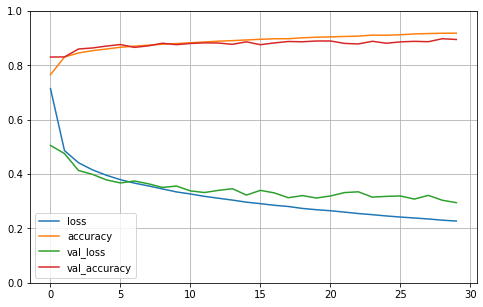

In [23]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

You can see that both the training accuracy & the validation accuracy steadily increase during training, while the training loss & the validation loss decrease. Good! Moreover, the validation curves are close to the training curves, which means that there is not too much overfitting. In this particular case, the model looks like it performed better on the validation set than on the training set at the beginning of training. but that's not the case: indeed, the validation error is computed at the *end* of each epoch, while the training error is computed using a running mean *during* each epoch. So the training curve should be shifted by half an epoch to the left. If you do that you will see that the training & validation curves overlap almost perfectly at the beginning of training.

The training set performance ends up beating the validation performance, as is generally the case when you train for long enough. You can tell that the model has not quite converged yet, as the validation loss is still going down, so you should probably continue training. It's as simple as calling the `fit()` method again, since Keras just continues training where it left off (you should be able to reach close to 89% validation accuracy).

If you are not satisfied with the performance of your model, you should go back & tune the hyperparameters. The first one to check is the learning rate. If that doesn't help, try another optimiser (& always return the learning rate after changing any hyperparameter). If the performance is still not great, then try tuning model hyperparameters such as the number of layers, the number of neurons per layer, & the types of activation functions to use for each hidden layer. You can also try tuning other hyperparameters, such as the batch size (it can be set in the `fit()` method using the `batch_size` argument, which defaults to 32). We will get back to hyperparameter tuning at the end of this chapter. Once you are satisfied with your model's validation accuracy, you should evaluate it on the test set to estimate the generalisation error before you deploy the model to production. You can easily do this using the `evaluate()` method (it also supports several other arguments, such as `batch_size` & `sample_wieght`; check documentation for more details):

In [24]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 63.4691 - accuracy: 0.8429


[63.46907424926758, 0.8428999781608582]

It is common to get slightly lower performance on the test set than on the validation set, because the hyperparameters are tuned on the validation set, not the test set (however, in this example, we did not do any hyperparameter tuning, so the lower accuracy is just bad luck). Remember to resist the temptation to tweak the hyperparameters on the test set, or else your estimate of the generalisation error will be too optimistic.

### Using the Model to Make Predictions

Next, we can use the model's `predict()` method to make predictions on new instances. Since we don't have actual new instances, we will just use the first three instances of the test set:

In [25]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 261ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

As you can see, for each instance the model estimates one probability per class, from class 0 to class 9. For example, it estimates that the probability of class 9 (ankle boot) is 100%. In other words, it is certain the first image is ankle boots. If you only care about the class with the highest estimated probability (even if that probability is quite low), then you can use the `predict()` method instead:

In [28]:
import numpy as np

y_pred = model.predict(X_new)
classes_x = np.argmax(y_pred, axis = 1)
classes_x

1/1 [==============================] - 0s 18ms/step


array([9, 2, 1])

In [29]:
np.array(class_names)[classes_x]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

Here, the classifier actually classified all three images correctly.

In [30]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

<img src = "Images/Correctly Classified Fashion MNIST.png" width = "550" style = "margin:auto"/>

Now you know how to use the sequential API to build, train, evaluate, & use a classification MLP. But what about regression?

## Building a Regression MLP Using the Sequential API

Let's switch to the California housing problem & tackle it using a regression neural network. For simplicity, we will use scikit-learn's `fetch_california_housing()` function to load the data. This dataset only contains numerical features & has no missing values. After loading the data, we split it into a training set, a validation set, & a test set, & we scale all the features:

In [31]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)
X_test = scaler.fit_transform(X_test)

Using the sequential API to build, train, evaluate, & use a regression MLP to make predictions is quite similar to what we did for classification. The main differences are the fact that the output layer has a single neuron (since we only want to predict a single value) & uses no activation function, & the loss function is the mean squared error. Since the dataset is quite noisy, we just use a single hidden layer with fewer neurons than before, to avoid overfitting:

In [32]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss = "mean_squared_error", optimizer = "sgd")
history = model.fit(X_train, y_train, epochs = 20, 
                    validation_data = (X_val, y_val))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] 
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.9050 - val_loss: 0.5646
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4930 - val_loss: 0.5125
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4592 - val_loss: 0.4963
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4442 - val_loss: 0.4866
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4333 - val_loss: 0.4764
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4228 - val_loss: 0.4734
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4169 - val_loss: 0.4620
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4092 - val_loss: 0.4526
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4045 - val_loss: 0.4571
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3981 - val_loss: 0.4451

As you can see, the sequential APi is quite easy to use. However, although `Sequential` models are extremely common, it is sometimes useful to build neural networks with more complex topologies, or with multiple inputs or outputs. For this purpose, Keras offers the functional API.

## Building Complex Models Using the Functional API

One example of a nonsequential neural network is a wide & deep neural network. This neural network architecture was introduced in a 2016 paper by Hneg-Tze Cheng. It connects all or part of the inputs directly to the output layer, as shown in the below figure.

<img src = "Images/Wide & Deep Neural Network.png" width = "400" style = "margin:auto"/>

This architecture makes it possible for the neural network to learn both deep patterns (using the deep path) & simple rules (through the short path). In contrast, a regular MLP corces all the data to flow through the full stack of layers; thus, simple patterns in the data may end up being distorted by this sequence of transformations.

Let's build such a neural network to tackle the California housing problem:

In [33]:
input_ = keras.layers.Input(shape = X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation = "relu")(input_)
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs = [input_], outputs = [output])

Let's go through each line of this code:

* First, we need to create an `Input` object. This is a specification of the kind of input he model will get, including its `shape` & `dtype`. A model may actually have multiple inputs, as we will see shortly.
* Next, we create a `Dense` layer with 30 neurons, using the ReLU activation function. As soon as it is created, notice that we call it like a function, passing it the input. This is why this is called the functional API. Note that we are just telling Keras how it should connect the layers together; no actual data is being processed yet.
* We then create a second hidden layer, & again we use it as a function. Note that we pass it the output of the first hidden layer.
* Next, we create a `Concatenate` layer, & once again we immediately use it like a function, to concatenate the input & the output of the second hidden layer. You may prefer the `keras.layers.concatenate()` function, which creates a `Concatenate` layer & immediately calls it with the given inputs.
* Then we create the output layer, with a single neuron & no activation function, & we call it like a function, passing it the result of the concatenation.
* Lastly, we create a Keras `Model`, specifying which inputs & outputs to use.

Once you have built the Keras model, everything is exactly like earlier, so there's no need to repeat it here: you must compile the model, train it, evaluate it, & use it to make predictions.

But what if you want to send a subset of the features through the wide path & a different subset (possibly overlapping) through the deep path? In this case, one solution is to use multiple inputs. For example, suppose we want to send five features through the wide path (features 0 to 4), & six features through the deep path (features 2 to 7):

In [34]:
input_A = keras.layers.Input(shape = [5], name = "wide_input")
input_B = keras.layers.Input(shape = [6], name = "deep_input")
hidden1 = keras.layers.Dense(30, activation = "relu")(input_B)
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name = "output")(concat)
model = keras.Model(inputs = [input_A, input_B], outputs = [output])

<img src = "Images/Handling Multiple Inputs.png" width = "400" style = "margin:auto"/>

The code is self-explanatory. You should name at least the most important layers, especially when the model gets a bit complex like this. note that we specified `inputs = [input_A, input_B]` when creating the model. now we can compile the model as usual, but when we call the `fit()` method, instead of passing a single input matrix `X_train`, we must pass a pair of matrices (`X_train_A`, `X_train_B`): one per input. The same is true for `X_val`, & also for `X_test` & `X_new` when you call `evaluate()` or `predict()`:

In [38]:
model.compile(loss = "mse", optimizer = keras.optimizers.SGD(lr = 1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_val_A, X_val_B = X_val[:, :5], X_val[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs = 20, 
                    validation_data = ((X_val_A, X_val_B), y_val))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.0269 - val_loss: 0.7836
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7053 - val_loss: 0.6677
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6198 - val_loss: 0.6421
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5884 - val_loss: 0.6240
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5675 - val_loss: 0.6086
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5512 - val_loss: 0.5966
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5384 - val_loss: 0.5865
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5281 - val_loss: 0.5776
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5198 - val_loss: 0.5700
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5130 - val_loss: 0.5637

There are many use cases in which you may want to have multiple outputs:

* The task may demand it. For instance, you may want to locate & classify the main object in a picture. This is both a regression task (finding the coordinates of the object's center, as well as its width & height) & a classification task.
* Similarly, you may have multiple independent tasks based on the same data. Sure, you could train one neural network per task, but in many cases you will get better results on all tasks by training a single neural network with one output per task. This is because the neural network can learn features in the data that are useful across tasks. For example, you could perform *multitask classification* on pictures of faces, using one output to classiy the person's facial expression (smiling, surprised, etc.) & another output to identify whether they are wearing glasses or not.
* Another use case is a regularisation technique (i.e., a training constraint whose objective is to reduce overfitting & thus improve the mode's ability to generalise). For example,you may want to add some auxiliary outputs in a neaural network architecture to ensure that the underlying part of the networks learns something useful on its own, without relying on the rest of the network.

<img src = "Images/Handling Multiple Outputs.png" width = "550" style = "margin:auto"/>

Adding extra inputs is quite easy: just connect them to the appropriate layers & add them to your model's list of outputs. For example, the following code builds the network represented in the above figure:

In [39]:
input_A = keras.layers.Input(shape = [5], name = "wide_input")
input_B = keras.layers.Input(shape = [6], name = "deep_input")
hidden1 = keras.layers.Dense(30, activation = "relu")(input_B)
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name = "main_output")(concat)
aux_output = keras.layers.Dense(1, name = "aux_output")(hidden2)

model = keras.Model(inputs = [input_A, input_B], outputs = [output, aux_output])

Each output will need its own loss function. Therefore, when we compile the model, we should pass a list of losses (if we pass a single loss, Keras will assume that the same loss must be used for all outputs). By default, Keras will compute all these losses & simply add them up to get the final loss used for training. We care much more about the main output than about the auxiliary output (as it is just used for regularisation), so we want to give the main output's loss a much greater weight. Fortunately, it is possible to set all the loss weights when compiling the model:

In [40]:
model.compile(loss = ["mse", "mse"], loss_weights = [0.9, 0.1], optimizer = "sgd")

Now when we train the model, we need to provide labels for each output. In this example, the main output & the auxiliary output should try to predict the same thing, so they should use the same labels. So instead of passing `y_train`, we need to pass (`y_train`, `y_train`) (& the same goes for `y_val` & `y_test`):

In [42]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs = 23, 
                    validation_data = ([X_val_A, X_val_B], [y_val, y_val]))

Epoch 1/23
363/363 [==============================] - 1s 2ms/step - loss: 1.1079 - main_output_loss: 1.0094 - aux_output_loss: 1.9947 - val_loss: 0.6610 - val_main_output_loss: 0.5983 - val_aux_output_loss: 1.2255
Epoch 2/23
363/363 [==============================] - 1s 2ms/step - loss: 0.5729 - main_output_loss: 0.5068 - aux_output_loss: 1.1677 - val_loss: 0.5779 - val_main_output_loss: 0.5294 - val_aux_output_loss: 1.0148
Epoch 3/23
363/363 [==============================] - 1s 2ms/step - loss: 0.5200 - main_output_loss: 0.4695 - aux_output_loss: 0.9746 - val_loss: 0.5388 - val_main_output_loss: 0.4991 - val_aux_output_loss: 0.8956
Epoch 4/23
363/363 [==============================] - 1s 2ms/step - loss: 0.4954 - main_output_loss: 0.4554 - aux_output_loss: 0.8559 - val_loss: 0.5216 - val_main_output_loss: 0.4902 - val_aux_output_loss: 0.8046
Epoch 5/23
363/363 [==============================] - 1s 2ms/step - loss: 0.4791 - main_output_loss: 0.4465 - aux_output_loss: 0.7725 - val_loss

When we evaluate the model, Keras will return the total loss, as well as all the individual losses:

In [43]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 1ms/step - loss: 6.4533 - main_output_loss: 6.4452 - aux_output_loss: 6.5266


Similarly, the `predict()` method will return predictions for each output:

In [44]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 137ms/step


As you can see, you can build any sort of architecture you want quite easily with the functional API. Let's look at one last way to you can build Keras models.

## Using the Subclassing API to Build Dynamic Models

Both the sequential API & the functional API are declarative: you start by declaring which layers you want to use & how they should be connected, & only then can you start feeding the model some data for training or inference. This has many advantages: the model can easily be saved, cloned, & shared; its structure can be displayed & analysed; the framework can infer shapes & check types, so errors can be caught early (i.e., before any data ever goes through the model). It's also fairly easy to debug, since the whole model is a static graph of layers. But the flip side is just that: it's static. Some models involve loops, varying shapes, conditional branching, & other dynamic behaviours. For such cases, or simply if you prefer a more imperative programming style, the subclassing API is for you.

Simply subclass the `Model` class, create the layers you need in the constructor, & use them to perform the computations you want in the `call()` method. For example, creating an instance of the following `WideAndDeepModel` class gives us an equivalent model to the one we just built with the functional API. You can then compile it, evaluate it, & use it to make predictions, exactly like we just did:

In [46]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units = 30, activation = "relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation = activation)
        self.hidden2 = keras.layers.Dense(units, activation = activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    def call(self, inputs):
        input_A, inputB = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel()

This example looks very much like the functional API, except we do not need to create the inputs; we just use the `input` argument to the `call()` method, & we separate the creation of the layers in the constructor from their usage in the `call()` method. The big difference is that you can do pretty much anything you want in the `call()` method; `for`loops, `if` statements, low-level Tensorflow operations -- your imagination is the limit! This makes it great API for researchers experimenting with new ideas.

This extra flexibility does come at a cost; your model's architecture is hidden within the `call()` method, so Keras cannot easily inspect it; it cannot save or clone it; & when you call the `summary()` method, you only get a list of layers. without any information on how they are connected to each other. Moreover, Keras cannot check types & shapes ahead of time, & it is easier to make mistakes. So unless you really need that extra flexibility, you should probably stick to teh sequential API or the functional API.

Now that you know how to build & train neural nets using Keras, you will want to save them!

## Saving & Restoring a Model

When using the sequential API or the functional API, saving a trained Keras model is as simple as it gets:

In [48]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape = [8]),
    keras.layers.Dense(30, activation = "relu"),
    keras.layers.Dense(1)
]) # or keras.Model([...])

model.compile(loss = "mse", optimizer = keras.optimizers.SGD(learning_rate = 1e-3))
history = model.fit(X_train, y_train, epochs = 10, 
                    validation_data = (X_val, y_val))
mse_test = model.evaluate(X_test, y_test)
model.save("my_keras_model.h5")

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 2.4122 - val_loss: 1.1709
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.9831 - val_loss: 0.7970
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.7279 - val_loss: 0.7228
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6657 - val_loss: 0.6860
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6300 - val_loss: 0.6574
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6024 - val_loss: 0.6341
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5784 - val_loss: 0.6137
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5580 - val_loss: 0.5981
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5407 - val_loss: 0.5838
Epoch 10/10
162/162 [==============================] - 0s 897us/step - loss: 0.5351


Keras will use the HDF5 format to save both the model's architecture (including every layer's hyperparameters) & the values of all the model parameters for every layer (e.g., connection weights & biases). It also saves the optimiser (including its hyperparameters & any state it may have).

You will typically have a script that trains a model & saves it, & one or more scripts (or web services) that load the model & use it to make predictions. Loading the model is just as easy.

In [49]:
model = keras.models.load_model("my_keras_model.h5")

But what if training lasts several hours? This is quite common, especially when training on large datasets. In this case, you should not only save your model at the end of training, but also save checkpoints at regular intervals during training, to avoid losing everything if your computer crashes. But how can you tell the `fit()` method to save checkpoints? Use callbacks.

## Using Callbacks

The `fit()` method accepts a `callbacks` argument that lets you specify a list of objects that Keras will call at the start & end of training, at the start & end of each epoch, & even before & after processing each batch. For example, the `ModelCheckpoint` callback saves checkpoints of your model at regular intervals during training, by default at the end of each epoch:

In [51]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape = [8]),
    keras.layers.Dense(30, activation = "relu"),
    keras.layers.Dense(1)
])
model.compile(loss = "mse", optimizer = keras.optimizers.SGD(learning_rate = 1e-3))

checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit(X_train, y_train, epochs = 10, callbacks = [checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 1.8411
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.7426
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6439
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5991
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5678
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5454
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5282
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5137
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5012
Epoch 10/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4907


Moreover, if you use a validation set during training, you can set `save_best_only = True` when creating the `ModelCheckpoint`. In this case, it will only save your model when its performance on the validation set is the best so far. This way, you do not need to worry about training for too long & overfitting the training set: simply restore the last model saved after training, & this will be the best model on the validation set. The following code is a simple way to implement early stopping:

In [53]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only = True)
history = model.fit(X_train, y_train, epochs = 10,
                    validation_data = (X_val, y_val),
                    callbacks = [checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # roll back to best model

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4815 - val_loss: 0.5337
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4740 - val_loss: 0.5253
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4670 - val_loss: 0.5218
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4613 - val_loss: 0.5136
Epoch 5/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4553 - val_loss: 0.5135
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4508 - val_loss: 0.5091
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4474 - val_loss: 0.4998
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4428 - val_loss: 0.4976
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4388 - val_loss: 0.4931
Epoch 10/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4356 - val_loss: 0.4942

Another way to implement early stopping is to simply use the `EarlyStopping` callback. It will interrupt training when it measures no progress on the validation set for a number of epochs (defined by the `patience` argument), & it will optionally roll back to the best model. You can combine both callbacks to save checkpoints of your model (in case your computer crashes) & interrupt training early when there is no more progress (to avoid wasting time & resources):

In [54]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10, 
                                                  restore_best_weights = True)
history = model.fit(X_train, y_train, epochs = 100,
                    validation_data = (X_val, y_val),
                    callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4356 - val_loss: 0.4946
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4331 - val_loss: 0.4879
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4300 - val_loss: 0.4835
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4275 - val_loss: 0.4837
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4252 - val_loss: 0.4797
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4230 - val_loss: 0.4787
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4212 - val_loss: 0.4806
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4206 - val_loss: 0.4743
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4189 - val_loss: 0.4732
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4161 - val_lo

The number of epochs can be set to a large value since training will stop automatically when there is no more progress. In this case, there is no need to restore the best model saved because the `EarlyStopping` callback will keep track of the best weights & retore them for you at the end of training.

If you need extra control, you can easily write your own custom callbacks. As an example of how to do that, the following custom callback will display the ratio between the validation loss & the training loss during training (e.g., to detect overfitting):

In [55]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"]/logs["loss"]))

As you might expect, you can implement `on_train_begin()`, `on_train_end()`, `on_epoch_begin()`, `on_epoch_end()`, `on_batch_begin()`, & `on_batch_end()`. Callbacks can also be used during evaluation & predictions, should you ever need them (e.g., for debugging). For evaluation, you should implement `on_test_begin()`, `on_test_end()`, `on_test_batch_begin()`, or `on_test_batch_end()` (called by `evaluate()`), & for prediction you should implement `on_predict_begin()`, `on_predict_end()`, `on_predict_batch_begin()`, or `on_predict_batch_end()` (called by `predict()`).

Now let's take a look at one more tool you should definitely have in your toolbox when using tf.keras: Tensorboard.

## Using Tensorboard for Visualisation

Tensorboard is a great interactive visualisation tool that you can use to view the learning curves during training, compare learning curves between multiple runs, visualise the computation graph, analyse training statistics, view images generated by your model, visualise complex multidimensional data projected down to 3D & automatically clustered for you, & more! This tool is installed automatically when you install Tensorflow, so you already have it.

To use it, you must modify your program so that it outputs the data you want to visualise to special binary log files called *event files*. Each binary data record is called a *summary*. The Tensorboard server will monitor the log directory, & it will automatically pick up the changes & update the visualisations: this allows you to visualise live data (with a short delay), such as the learning curves during training. In general, you want to point the Tensorboard server to a root log directory & configure your program so that it writes to a different subdirectory every time it runs. This way, the same Tensorboard server will allow you to visualise & compare data from multiple runs of your program, without getting everything mixed up.

Let's start by defining the root log directory we will use for our Tensorboard logs, plus a small function that will generate a subdirectory path based on the current data & time so that it's different at every run. You may want to include extra information in the log directory name, such as hyperparameter values that you are testing, to make it easier to know what you are looking at in Tensorboard:

In [59]:
import os
root_logdir = os.path.join("/Users/jiehengyu/Desktop/ML Python/Chapter 10", "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

The good news is that Keras provides a nice `TensorBoard()` callback:

In [60]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape = [8]),
    keras.layers.Dense(30, activation = "relu"),
    keras.layers.Dense(1)
])
model.compile(loss = "mse", optimizer = keras.optimizers.SGD(learning_rate = 1e-3))

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs = 30,
                    validation_data = (X_val, y_val),
                    callbacks = [tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 1.6016 - val_loss: 0.8829
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.8016 - val_loss: 0.7757
Epoch 3/30
363/363 [==============================] - 1s 1ms/step - loss: 0.7186 - val_loss: 0.7301
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: 0.6726 - val_loss: 0.6943
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6360 - val_loss: 0.6645
Epoch 6/30
363/363 [==============================] - 1s 1ms/step - loss: 0.6055 - val_loss: 0.6363
Epoch 7/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5787 - val_loss: 0.6139
Epoch 8/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5561 - val_loss: 0.5951
Epoch 9/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5365 - val_loss: 0.5807
Epoch 10/30
363/363 [==============================] - 1s 1ms/step - loss: 0.5198 - val_loss: 0.5672

That's all there is to it! It could hardly be easier to use. If you run this code, the `TensorBoard()` callback will take care to creating the log directory for you (along with its parent directories if needed), & during training it will create event files & write summarise to them. After running the program a second time (perhaps changing some hyperparameter value), you will end up with a directory structure similar to this one:

In [ ]:
my_logs/
|-- run_2019_06_07-15_15_22
|    |-- train
|    |    |-- events.out.tfevents.1559891732.mycomputer.local.38511.694049.v2
|    |    |-- events.out.tfevents.1559891732.mycomputer.local.profile-empty
|    |    |-- plugins/profile/2019-06-07_15-15-32
|    |        |-- local.trace
|    |-- validation
|         |-- events.out.tfevents.1559891733.mycomputer.local.38511.696430.v2
|-- run_2019_06_07-15_15_49
     |-- [...]

There is one directory per run, each containing one subdirectory for training logs & one for validation logs. Both contain event files, but the training logs also include profiling traces: this allows Tensorboard to show you exactly how much time the model spent on each part of your model, across all your devices, which is great for locating performance bottelnecks.

Next, you need to start the Tensorboard server. One way to do this is by running a command in a terminal. If you installed Tensorflow within a virtualenv, you should activate it. Next, run the following command at the root of the project (or from anywhere else, as long as you point to the appropriate log directory):

In [ ]:
$ tensorboard --logdir=./my_logs --port=6006

If your shell cannot find the *tensorboard* script, then you must update your `PATH` environment variable so that it contains the directory in which the script was installed (alternatively, you can just replace `tensorboard` in the command line with `python3 -m tensorboard.main`). Once the server is up, you can open a web browser & go to *http://localhost:6006*. 

Alternatively, you can use Tensorbaord directly within jupyter, by running the following commands. The first line loads the Tensorboard extension, & the second line starts a Tensorboard server on port 6006 (unless it is already started) & connects to it:

In [63]:
%load_ext tensorboard
%tensorboard --/Users/jiehengyu/Desktop/ML Python/Chapter 10/my_logs --port=6006

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Either way, you should see Tensorboard's web interface. Click the SCALARS tab to view the learning curves. At the bottom left, select the logs you want to visualise (e.g., the training logs from the first & second run), & click the `epoch_loss` scalar. Notice that the training loss went down nicely during both runs, but the second run went down much faster. Indeed, we used a learning rate of 0.05 (`optimizer = keras.optimizers.SGD(lr = 0.05)`) instead of 0.001.

You can also visualise the whole graph, the learned weights (projected to 3D, or the profiling traces. The `TensorBoard()` callback has options to log extra data too, such as embeddings.

Additionally, Tensorflow offers a lower-level API in the `tf.summary` package. The following code creates a `SummaryWriter` using the `create_file_writer()` function, & it uses this writer as a context to log scalars, histograms, images, audio, & text, all of which can then be visualised using Tensorboard:

In [65]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)

with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step = step)
        data = (np.random.randn(100) + 2) * step / 100
        tf.summary.histogram("my_hist", data, buckets = 50, step = step)
        images = np.random.rand(2, 32, 32, 3)
        tf.summary.image("my_images", images * step / 1000, step = step)
        texts = ["The step is " + str(step), "Its square is " + str(step ** 2)]
        tf.summary.text("my_text", texts, step = step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate = 48000, step = step)

This is actually a useful visualisation tool to have, even beyond Tensorflow or deep learning.

Let's summarise what you've learned so far in this lesson: we saw where neural nets came from, what an MLP is & how you can use it for classification & regression, how to use tf.keras's sequential API to build MLPs, & how to use the functional API or the subclassing API to build more complex model architectures. You learned how to save & restore a model & how to use callbacks for checkpointing, early stopping, & more. Finally, you learned how to use Tensorboard for visualisation. You can already go ahead & use neural networks to tackle many problems. However, you may wonder how to choose the number of hidden layers, the number of neurons in the network, & all the other hyperparameters. Let's look at this now.

---

# Fine-Tuning Neural Network Hyperparameters

The flexibility of neural networks is also one of their main drawbacks: there are many hyperparameters to tweak. Not only can you use any imaginable network architecture, but even in a simple MLP you can change the number of layers, the number of neurons per layer, the type of activation function to use in each layer, the weight initialisation logic, & much more. How do you know what combination of hyperparameters is the best for your task?

One option is to simply try many combinations of hyperparameters & see which one works best on the validation set (or use K-fold cross-validation). For example, we can use `GridSearchCV` or `RandomizedSearchCV` to explore the hyperparameter space. To do this, we need to wrap our Keras models in objects that mimic regular scikit-learn regressors. The first step is to create a function that will build & compile a Keras model, given a set of hyperparameters:

In [67]:
def build_model(n_hidden = 1, n_neurons = 30, learning_rate = 3e-3, input_shape = [8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape = input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation = "relu"))
    optimizer = keras.optimizers.SGD(lr = learning_rate)
    model.compile(loss = "mse", optimizer = optimizer)
    return model

This function creates a simple `Sequential` model for univariate regression (only one output neuron), with the given input shape & the given number of hidden layers & neurons, & it compiles it using an `SGD` optimizer configured with the specified learning rate. It is good practice to provide reasonable defaults to as many hyperparameters as you can, as scikit-learn does.

Next, let's create a `KerasRegressor` based on this `build_model()` function:

In [70]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

/var/folders/n6/mwqj58td1tlf_3mrmgghsykh0000gp/T/ipykernel_15873/1709004121.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


The `KerasRegressor` object is a thin wrapper around the keras model built using `build_model()`. Since we did not specify any hyperparameters when creating it, it will use the default hyperparameters we defined in `build_model()`. Now, we can use this object like a regular scikit-learn regressor: we can train it using its `fit()` method, then evaluate it using its `score()` method, & use it to make predictions using its `predict()` method, as you can see in the following code:

In [72]:
keras_reg.fit(X_train, y_train, epochs = 100,
              validation_data = (X_val, y_val),
              callbacks = [keras.callbacks.EarlyStopping(patience = 10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

Epoch 1/100


/Users/jiehengyu/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


363/363 [==============================] - 1s 2ms/step - loss: 4.8802 - val_loss: 4.6707
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 4.6691 - val_loss: 4.4642
Epoch 3/100
363/363 [==============================] - 1s 1ms/step - loss: 4.4572 - val_loss: 4.2600
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 4.2497 - val_loss: 4.0606
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 4.0481 - val_loss: 3.8668
Epoch 6/100
363/363 [==============================] - 1s 1ms/step - loss: 3.8524 - val_loss: 3.6784
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 3.6625 - val_loss: 3.4959
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 3.4796 - val_loss: 3.3205
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 3.3035 - val_loss: 3.1517
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 3.1332 - val_loss: 2.9883
E

Note that any extra parameter you pass to the `fit(0` method will get passed to the underlying Keras model. Also note that the score will be the opposite of the MSE because scikit-learn wants scores, not losses (i.e., higher should be better).

We don't want to train & evaluate a single model like this, though we want to train hundred of variants & see which one performs best on the validation set. Since there are many hyperparameters, it is perferable to use a randomised search rater than grid search. Let's try to explore the number of hidden layers, the number of neurons, & the learning rate:

In [75]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {"n_hidden":[0, 1, 2, 3],
                  "n_neurons": np.arange(1, 100),
                  "learning_rate": reciprocal(3e-4, 3e-2)}
rand_search = RandomizedSearchCV(keras_reg, param_distribs, n_iter = 10, cv = 3)
rand_search.fit(X_train, y_train, epochs = 100, 
                validation_data = (X_val, y_val),
                callbacks = [keras.callbacks.EarlyStopping(patience = 10)])

Epoch 1/100
 61/242 [======>.......................] - ETA: 0s - loss: 6.8817 

/Users/jiehengyu/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 0s 2ms/step - loss: 6.5465 - val_loss: 6.3409
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 6.5465 - val_loss: 6.3409
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 6.5465 - val_loss: 6.3409
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 6.5465 - val_loss: 6.3409
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 6.5465 - val_loss: 6.3409
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 6.5465 - val_loss: 6.3409
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 6.5465 - val_loss: 6.3409
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 6.5465 - val_loss: 6.3409
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 6.5465 - val_loss: 6.3409
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 6.5465 - val_loss: 6.3409
E

/Users/jiehengyu/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 0s 2ms/step - loss: 6.3379 - val_loss: 6.3409
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 6.3379 - val_loss: 6.3409
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 6.3379 - val_loss: 6.3409
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 6.3379 - val_loss: 6.3409
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 6.3379 - val_loss: 6.3409
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 6.3379 - val_loss: 6.3409
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 6.3379 - val_loss: 6.3409
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 6.3379 - val_loss: 6.3409
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 6.3379 - val_loss: 6.3409
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 6.3379 - val_loss: 6.3409
E

/Users/jiehengyu/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 0s 1ms/step - loss: 6.4129 - val_loss: 6.3409
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 6.4129 - val_loss: 6.3409
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 6.4129 - val_loss: 6.3409
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 6.4129 - val_loss: 6.3409
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 6.4129 - val_loss: 6.3409
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 6.4129 - val_loss: 6.3409
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 6.4129 - val_loss: 6.3409
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 6.4129 - val_loss: 6.3409
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 6.4129 - val_loss: 6.3409
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 6.4129 - val_loss: 6.3409
E

/Users/jiehengyu/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 0s 1ms/step - loss: 6.5465 - val_loss: 6.3409
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 6.5465 - val_loss: 6.3409
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 6.5465 - val_loss: 6.3409
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 6.5465 - val_loss: 6.3409
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 6.5465 - val_loss: 6.3409
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 6.5465 - val_loss: 6.3409
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 6.5465 - val_loss: 6.3409
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 6.5465 - val_loss: 6.3409
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 6.5465 - val_loss: 6.3409
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 6.5465 - val_loss: 6.3409
E

/Users/jiehengyu/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 0s 1ms/step - loss: 6.3379 - val_loss: 6.3409
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 6.3379 - val_loss: 6.3409
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 6.3379 - val_loss: 6.3409
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 6.3379 - val_loss: 6.3409
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 6.3379 - val_loss: 6.3409
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 6.3379 - val_loss: 6.3409
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 6.3379 - val_loss: 6.3409
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 6.3379 - val_loss: 6.3409
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 6.3379 - val_loss: 6.3409
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 6.3379 - val_loss: 6.3409
E

/Users/jiehengyu/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 2ms/step - loss: 6.4129 - val_loss: 6.3409
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 6.4129 - val_loss: 6.3409
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 6.4129 - val_loss: 6.3409
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 6.4129 - val_loss: 6.3409
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 6.4129 - val_loss: 6.3409
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 6.4129 - val_loss: 6.3409
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 6.4129 - val_loss: 6.3409
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 6.4129 - val_loss: 6.3409
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 6.4129 - val_loss: 6.3409
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 6.4129 - val_loss: 6.3409
E

/Users/jiehengyu/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 0s 2ms/step - loss: 6.5465 - val_loss: 6.3409
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 6.5465 - val_loss: 6.3409
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 6.5465 - val_loss: 6.3409
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 6.5465 - val_loss: 6.3409
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 6.5465 - val_loss: 6.3409
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 6.5465 - val_loss: 6.3409
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 6.5465 - val_loss: 6.3409
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 6.5465 - val_loss: 6.3409
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 6.5465 - val_loss: 6.3409
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 6.5465 - val_loss: 6.3409
E

/Users/jiehengyu/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 2ms/step - loss: 6.3379 - val_loss: 6.3409
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 6.3379 - val_loss: 6.3409
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 6.3379 - val_loss: 6.3409
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 6.3379 - val_loss: 6.3409
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 6.3379 - val_loss: 6.3409
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 6.3379 - val_loss: 6.3409
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 6.3379 - val_loss: 6.3409
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 6.3379 - val_loss: 6.3409
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 6.3379 - val_loss: 6.3409
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 6.3379 - val_loss: 6.3409
E

/Users/jiehengyu/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 2ms/step - loss: 6.4129 - val_loss: 6.3409
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 6.4129 - val_loss: 6.3409
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 6.4129 - val_loss: 6.3409
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 6.4129 - val_loss: 6.3409
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 6.4129 - val_loss: 6.3409
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 6.4129 - val_loss: 6.3409
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 6.4129 - val_loss: 6.3409
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 6.4129 - val_loss: 6.3409
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 6.4129 - val_loss: 6.3409
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 6.4129 - val_loss: 6.3409
E

/Users/jiehengyu/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 2ms/step - loss: 5.1751 - val_loss: 5.0099
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 5.1656 - val_loss: 5.0007
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 5.1561 - val_loss: 4.9915
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 5.1464 - val_loss: 4.9821
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 5.1368 - val_loss: 4.9728
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 5.1270 - val_loss: 4.9633
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 5.1173 - val_loss: 4.9539
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 5.1074 - val_loss: 4.9443
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 5.0976 - val_loss: 4.9348
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 5.0877 - val_loss: 4.9252
E

/Users/jiehengyu/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 2ms/step - loss: 5.0004 - val_loss: 5.0222
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 4.9912 - val_loss: 5.0130
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 4.9819 - val_loss: 5.0037
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 4.9725 - val_loss: 4.9943
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 4.9630 - val_loss: 4.9849
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 4.9535 - val_loss: 4.9754
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 4.9440 - val_loss: 4.9659
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 4.9344 - val_loss: 4.9563
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 4.9248 - val_loss: 4.9466
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 4.9151 - val_loss: 4.9369
E

/Users/jiehengyu/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 1ms/step - loss: 5.2138 - val_loss: 5.0360
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 5.2050 - val_loss: 5.0274
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 5.1961 - val_loss: 5.0187
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 5.1872 - val_loss: 5.0100
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 5.1782 - val_loss: 5.0013
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 5.1692 - val_loss: 4.9924
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 5.1601 - val_loss: 4.9836
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 5.1509 - val_loss: 4.9746
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 5.1417 - val_loss: 4.9657
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 5.1325 - val_loss: 4.9567
E

/Users/jiehengyu/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 2ms/step - loss: 6.5465 - val_loss: 6.3409
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 6.5465 - val_loss: 6.3409
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 6.5465 - val_loss: 6.3409
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 6.5465 - val_loss: 6.3409
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 6.5465 - val_loss: 6.3409
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 6.5465 - val_loss: 6.3409
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 6.5465 - val_loss: 6.3409
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 6.5465 - val_loss: 6.3409
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 6.5465 - val_loss: 6.3409
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 6.5465 - val_loss: 6.3409
E

/Users/jiehengyu/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 6.3379 - val_loss: 6.3409
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 6.3379 - val_loss: 6.3409
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 6.3379 - val_loss: 6.3409
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 6.3379 - val_loss: 6.3409
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 6.3379 - val_loss: 6.3409
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 6.3379 - val_loss: 6.3409
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 6.3379 - val_loss: 6.3409
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 6.3379 - val_loss: 6.3409
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 6.3379 - val_loss: 6.3409
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 6.3379 - val_loss: 6.3409
E

/Users/jiehengyu/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 0s 1ms/step - loss: 6.4129 - val_loss: 6.3409
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 6.4129 - val_loss: 6.3409
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 6.4129 - val_loss: 6.3409
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 6.4129 - val_loss: 6.3409
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 6.4129 - val_loss: 6.3409
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 6.4129 - val_loss: 6.3409
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 6.4129 - val_loss: 6.3409
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 6.4129 - val_loss: 6.3409
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 6.4129 - val_loss: 6.3409
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 6.4129 - val_loss: 6.3409
E

/Users/jiehengyu/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 2ms/step - loss: 5.1877 - val_loss: 5.0041
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 5.1454 - val_loss: 4.9610
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 5.1001 - val_loss: 4.9150
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 5.0517 - val_loss: 4.8659
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 5.0001 - val_loss: 4.8137
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 4.9452 - val_loss: 4.7581
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 4.8869 - val_loss: 4.6992
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 4.8251 - val_loss: 4.6369
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 4.7596 - val_loss: 4.5710
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 4.6905 - val_loss: 4.5017
E

/Users/jiehengyu/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 2ms/step - loss: 5.0078 - val_loss: 5.0132
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 4.9695 - val_loss: 4.9730
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 4.9287 - val_loss: 4.9303
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 4.8855 - val_loss: 4.8852
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 4.8398 - val_loss: 4.8376
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 4.7918 - val_loss: 4.7877
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 4.7414 - val_loss: 4.7353
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 4.6886 - val_loss: 4.6805
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 4.6334 - val_loss: 4.6232
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 4.5758 - val_loss: 4.5637
E

/Users/jiehengyu/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 2ms/step - loss: 5.1962 - val_loss: 4.9997
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 5.1531 - val_loss: 4.9564
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 5.1074 - val_loss: 4.9104
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 5.0590 - val_loss: 4.8619
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 5.0079 - val_loss: 4.8108
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 4.9541 - val_loss: 4.7571
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 4.8977 - val_loss: 4.7008
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 4.8386 - val_loss: 4.6419
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 4.7767 - val_loss: 4.5802
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 4.7119 - val_loss: 4.5159
E

/Users/jiehengyu/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 2ms/step - loss: 4.3101 - val_loss: 3.5145
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 3.0790 - val_loss: 2.4609
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 2.0832 - val_loss: 1.6518
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 1.3866 - val_loss: 1.1458
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.9772 - val_loss: 0.8778
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7734 - val_loss: 0.7528
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6779 - val_loss: 0.6945
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6314 - val_loss: 0.6641
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6061 - val_loss: 0.6467
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5908 - val_loss: 0.6358
E

/Users/jiehengyu/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 2ms/step - loss: 4.0235 - val_loss: 3.4115
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 2.8554 - val_loss: 2.4088
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 1.9966 - val_loss: 1.7093
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 1.3974 - val_loss: 1.2377
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 1.0222 - val_loss: 0.9613
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.8000 - val_loss: 0.7953
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6746 - val_loss: 0.7079
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6126 - val_loss: 0.6670
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5831 - val_loss: 0.6473
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5675 - val_loss: 0.6358
E

/Users/jiehengyu/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 2ms/step - loss: 4.2987 - val_loss: 3.6079
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 3.2959 - val_loss: 2.7961
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 2.5101 - val_loss: 2.0666
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 1.7625 - val_loss: 1.4227
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 1.2031 - val_loss: 1.0040
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.8791 - val_loss: 0.7891
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7260 - val_loss: 0.6947
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6588 - val_loss: 0.6538
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6273 - val_loss: 0.6341
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6101 - val_loss: 0.6227
E

/Users/jiehengyu/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 0s 1ms/step - loss: 6.5465 - val_loss: 6.3409
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 6.5465 - val_loss: 6.3409
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 6.5465 - val_loss: 6.3409
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 6.5465 - val_loss: 6.3409
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 6.5465 - val_loss: 6.3409
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 6.5465 - val_loss: 6.3409
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 6.5465 - val_loss: 6.3409
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 6.5465 - val_loss: 6.3409
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 6.5465 - val_loss: 6.3409
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 6.5465 - val_loss: 6.3409
E

/Users/jiehengyu/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 0s 1ms/step - loss: 6.3379 - val_loss: 6.3409
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 6.3379 - val_loss: 6.3409
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 6.3379 - val_loss: 6.3409
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 6.3379 - val_loss: 6.3409
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 6.3379 - val_loss: 6.3409
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 6.3379 - val_loss: 6.3409
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 6.3379 - val_loss: 6.3409
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 6.3379 - val_loss: 6.3409
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 6.3379 - val_loss: 6.3409
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 6.3379 - val_loss: 6.3409
E

/Users/jiehengyu/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 0s 1ms/step - loss: 6.4129 - val_loss: 6.3409
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 6.4129 - val_loss: 6.3409
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 6.4129 - val_loss: 6.3409
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 6.4129 - val_loss: 6.3409
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 6.4129 - val_loss: 6.3409
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 6.4129 - val_loss: 6.3409
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 6.4129 - val_loss: 6.3409
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 6.4129 - val_loss: 6.3409
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 6.4129 - val_loss: 6.3409
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 6.4129 - val_loss: 6.3409
E

/Users/jiehengyu/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 2ms/step - loss: 4.9974 - val_loss: 4.8073
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 4.9585 - val_loss: 4.7694
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 4.9191 - val_loss: 4.7313
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 4.8795 - val_loss: 4.6929
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 4.8397 - val_loss: 4.6543
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 4.7998 - val_loss: 4.6156
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 4.7598 - val_loss: 4.5768
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 4.7197 - val_loss: 4.5380
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 4.6794 - val_loss: 4.4990
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 4.6391 - val_loss: 4.4601
E

/Users/jiehengyu/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 2ms/step - loss: 4.6312 - val_loss: 4.6223
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 4.5914 - val_loss: 4.5831
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 4.5516 - val_loss: 4.5439
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 4.5119 - val_loss: 4.5049
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 4.4724 - val_loss: 4.4659
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 4.4331 - val_loss: 4.4271
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 4.3939 - val_loss: 4.3886
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 4.3551 - val_loss: 4.3503
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 4.3166 - val_loss: 4.3123
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 4.2783 - val_loss: 4.2746
E

/Users/jiehengyu/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 2ms/step - loss: 4.9462 - val_loss: 4.7742
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 4.9051 - val_loss: 4.7339
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 4.8637 - val_loss: 4.6934
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 4.8220 - val_loss: 4.6528
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 4.7802 - val_loss: 4.6121
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 4.7383 - val_loss: 4.5713
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 4.6963 - val_loss: 4.5305
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 4.6544 - val_loss: 4.4898
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 4.6125 - val_loss: 4.4492
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 4.5707 - val_loss: 4.4087
E

/Users/jiehengyu/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 5.2142 - val_loss: 5.0462
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 5.2002 - val_loss: 5.0326
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 5.1861 - val_loss: 5.0188
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 5.1719 - val_loss: 5.0049
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 5.1576 - val_loss: 4.9909
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 5.1431 - val_loss: 4.9769
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 5.1286 - val_loss: 4.9627
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 5.1140 - val_loss: 4.9484
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 5.0992 - val_loss: 4.9341
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 5.0844 - val_loss: 4.9197
E

/Users/jiehengyu/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 2ms/step - loss: 5.0239 - val_loss: 5.0427
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 5.0102 - val_loss: 5.0289
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 4.9965 - val_loss: 5.0151
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 4.9825 - val_loss: 5.0012
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 4.9685 - val_loss: 4.9871
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 4.9544 - val_loss: 4.9730
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 4.9402 - val_loss: 4.9587
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 4.9259 - val_loss: 4.9444
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 4.9115 - val_loss: 4.9300
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 4.8971 - val_loss: 4.9156
E

/Users/jiehengyu/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 2ms/step - loss: 5.2090 - val_loss: 5.0275
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 5.1944 - val_loss: 5.0133
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 5.1796 - val_loss: 4.9989
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 5.1648 - val_loss: 4.9845
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 5.1498 - val_loss: 4.9699
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 5.1347 - val_loss: 4.9552
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 5.1195 - val_loss: 4.9405
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 5.1043 - val_loss: 4.9256
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 5.0889 - val_loss: 4.9107
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 5.0734 - val_loss: 4.8957
E

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7fbe68a311c0>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fbe87bcfdc0>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

This is identical to what we have done before in previous lessons, but here we pass parameters to the `fit()` method, & they get relayed to the underlying Keras models. Note that `RandomizedSearchCV` uses K-fold cross-validation, so it does not use `X_val` & `y_val`, which are only used for early stopping.

The exploration may last many hours, depending on the hardware, the size of the dataset, the complexity of the model, & the values of `n_iter` & `cv`. When it's over, you can access the best parameters found, the best score, & the trained Keras model like so:

In [76]:
rand_search.best_params_

{'learning_rate': 0.017335062093214396, 'n_hidden': 1, 'n_neurons': 17}

In [77]:
rand_search.best_score_

-0.4888018071651459

In [80]:
model = rand_search.best_estimator_.model

You can now save this model, evaluate it on the test set, & if you are satisfied with its performance, deploy it to production. Using randomised search is not too hard, & it works well for many fairly simple problems. When training is slow, however (e.g., for more complex problems with larger datasets), this approach will only explore a tiny portion of the hyperparameter space. You can partially alleviate this problem by assisting the search process manually: first run a quick random search using wide ranges of hyperparameter values, then run another search using smaller ranages of values centered on the best ones found during the first run, & so on. This approach will hopefully zoom in on a good set of hyperparameters. However, it's very time consuming, & probably not the best use of your time.

Fortunately, there are many techniques to explore a search space much more efficiently than randomly. Their core idea is simple: when a region of the space turns out to be good, it should be explored more. Such techniques take care of the "zooming" process for you & lead to much better solutions in much less time. Here are some python libraries you can use to optimise hyperparameters.

* *Hyperopt*
   * A popular library for optimising over all sorts of complex search spaces (including real values, such as the learning rate, & discrete values, such as the number of layers).
* *Hypera*, *kopt*, or *Talos*
   * Useful libraries for optimising hyperparameters for Keras models (the first two are based on Hyperopt).
* *Keras Tuner*
   * An easy-to-use hyperparameter optimisation library by Google for Keras models, with a hosted service for visualisation & analysis.
* *Scikit-Optimise* (skopt)
   * A general-purpose optimisation library. The `BayesSearchCV` class performs Bayesian optimisation using an interface similar to `GridSearchCV`.
* *Spearmint*
   * A Bayesian optimisation library.
* *Hyperband*
   * A fast hyperparameter tuning library based on the recent Hyperband paper by Lisha Li.
* *Sklearn-Deap*
   * A hyperparameter optimisation library based on evolutionary algorithms, with a `GridSearchCV`-like interface.
   
Moreover, many companies offer services for hyperparameter optimisations, such as Google cloud AI platform's hyperparameter tuning service. Other options include services by Arimo, SigOpt, & CallDesk's Oscar.

Hyperparameter tuning is still an active area of research, & evolutionary algorithms are making a comeback. For example, check out DeepMind's excellent 2017 paper, where the authors jointly optimise a population of models & their hyperparameters. Google has also use an evolutionary approach, not just to search for hyperparameters but also to look for the best neural network architecture for the problem; their AutoML suite is already available as a cloud service. Perhaps the days of building neural networks will soon be over. Check out Google's post on this topic. In fact, evolutionary algorithms have been used successfully to train individual neural networks, replacing the ubiquitous gradient descent. For an example, see the 2017 post by Uber, where the authors introduce their *deep neuroevolution* technique.

But despite all this exciting progress & all these tools & services, it still helps to have an idea of what values are reasonable for each hyperparameter so that you can build a quick prototype & restrict the search space. The following sections provide guidelines for choosing the number of hidden layers & neurons in an MLP & for selecting good values for some of the main hyperparameters.

## Number of Hidden Layers

For many problems, you can begin with a single hidden layer & get reasonable results. A MLP with just one hidden layer can theoretically model even the most complex functions, provided it has enough neurons. But for complex problems, deep networks have a much higher *parameter efficiency* than shallow ones: they can model complex function using exponentially fewer neurons than shallow nets, allowing them to reach much better performance with the same amount of training data. 

To understand why, suppose you are asked to draw a forest using some drawing software, but you are forbidden to copy & paste anything. It would take an enormous amount of time: you would have to draw each tree individually, branch by branch, leaf by leaf. If you could instead draw one leaf, copy & paste it to draw a branch, then copy & paste that branch to create a tree, & finally copy & paste this tree to make a forest, you would be finished in no time. Real-world data is often structured in such a hierarchical way, & deep neural networks automatically take advantage of this fact: lower hidden layers model low-level structures (e.g., line segments of various shapes & orientations), intermediate hidden layers combine these low-level structures to model intermediate-level structures (e.g., squared, circles), & the highest hidden layers & the output layer combine these intermediate structures to model high-level structures (e.g., faces).

Not only does this hierarchical architecture help DNNs converge faster to a good solution, but it also improves their ability to generalise to new datasets. For example, if you have already trained a model to recognise faces in pictures & you now want to train a new neural network to recognise hairstyles, you can kickstart the training by reusing the lower layers of the first network. Instead of randomly initialising the weights & biases of the first few layers of the new neural network, you can initialise them to the values of the weights & biases of the lower layers of the first network. This way, the network will not have to learn from scratch all the low-level structures that occur in most pictures; it will only have to learn the higher-level structures (e.g., hairstyles). This is called *transfer learning*.

In summary, for many problems you can start with just one or two hidden layers & the neural network will work just fine. For instance, you can easily reach above 97% accuracy on the MNIST dataset using just one hidden layer with a few hundred neurons, in roughly the same amount of training time. For more complex problems, you can ramp up the number of hidden layers until you start overfitting the training set. Very complex tasks, such as large image classification or speech recognition, typically require networks with dozens of layers (or even hundreds, but not fully connected ones), & they need a huge amount of training data. You will rarely have to train such networks from scratch: it is much more common to reuse parts of a pretrained state-of-the-art network that performs a similar task. Training will be a lot faster & require much less data.

## Number of Neurons per Hidden Layer

The number of neurons in the input & output layers is determined by the type of input & output your task requires. For example, the MNIST task requires 28 x 28 = 784 input neurons & 10 output neurons.

As for the hidden layers, it used to be common to size them to form a pyramid, with fewer & fewer neurons at each layer -- the rationale being that many low-level features can coalesce into far fewer high-level features. A typical neural network for MNIST might have 3 hidden layers, the first with 300 neurons, the second with 200, & the third with 100. However, this practice has been largely abandoned because it seems that using the same number of neurons in all hidden layers performs just as well in most cases, or even better; plus, there is only one hyperprameter to tune, instead of one per layer. That said, depending on the dataset, it can sometimes help to make the first hidden layer bigger than the others.

Just like the number of layers, you can try increasing the number of neurons gradually until the network starts overfitting. But in practice, it's often simpler & more efficient to pick a model with more layers & neurons than you actually need, then use early stopping & other regularisation techniques to prevent it from overfitting. Vincent Vanhoucke, a scientist at Google, has dubbed this the "stretch pants" approach: instead of wasting time looking for pants that perfectly match your size, just use large stretch pants that will shrink down to the right size. With this approach, you avoid bottleneck layers that could ruin your model. On the flip size, if a layer has too few neurons, it will not have enough representational power to preserve all the useful information from the inputs (e.g., a layer with two neurons can only output 2D data, so if it processes 3D data, some information will be lost). No matter how big & powerful the rest of the network is, that information will never be recovered.

## Learning Rate, Batch Size, & Other Hyperparameters

The numbers of hidden layers & neurons are not the only hyperparameters you can tweak in a MLP. Here are some of the most important ones, as well as tips on how to set them:

* *Learning rate*
   * The learning rate is arguably the most important hyperparameter. In general, the optimal learning rate is about half of the maximum learning rate (i.e., the learning rate above which the training algorithm diverges). One way to find a good learning rate is to train the model for a few hundred iterations, starting with a very low learning rate (e.g., $10^{-5}$) & gradually increasing it up to a very large value (e.g., 10). This is done by multiplying the learning rate by a constant factor at each iteration (e.g., by $e^{\frac{log(10^6)}{500}}$ to go from $10^{-5}$ to 10 in 500 iterations). If you plot the loss as a function of the learning rate (using a log scale for the learning rate), you should see it dropping at first. But after a while, the learning rate will be too large, so the loss will shoot back up: the optimal learning rate will be a bit lower than the point at which the loss starts to climb (typically about 10 times lower than the turning point). You can the reinitialise your model & train it normally using this good learning rate.
* *Optimizer*
   * Choosing a better optimiser than plain old mini-batch gradient descent (& tuning its hyperparameters) is also quite important.
* *Batch size*
   * The batch size can have a significant impact on your model's performance & training time. The main benefit of using large batch sizes is that hardware accelerators like GPUs can process them efficiently, so the training algorithm will see more instances per second. Therefore, many researchers & practitioners recommend using the largest batch size that can fit in GPU RAM. There's a catch, though: in practice, large batch sizes often lead to training instabilities, especially at the beginning of training, & the resulting model may not generalise as well as model trained with a small batch size. In April 2018, Yann LeCun even tweeted, "Friends don't let friends use mini-batches larger than 32," citing a 2018 paper by Dominic Masters & Carlo Luschi which concluded that using small batches (from 2 to 32) was preferable because small batches led to better models in less training time. Other papers point in the opposite direction, however; in 2017, papers by Elad Hoffer & Priya Goyal showed that it was possible to use very large batch sizes (up to 8,192) using various techniques such as warming up the learning rate (i.e., starting training with a small learning rate, then ramping it up). This led to a very short training time, without any generalisation gap. So, one strategy is to try to use a large batch size, using learning rate warmup, & if training is unstable or the final performance is disappointing, then try using a small batch size instead.
* *Activation function*
   * We discussed how to choose the activation function earlier in this chapter: in general, the ReLU activation function will be a good default for all hidden layers. For the output layer, it really depends on your task.
* *Number of iterations*
   * In most cases, the number of training iterations does not actually need to be tweaked: just use early stopping instead.
   
For more best practices regarding tuning neural network hyperparameters, check out the 2018 paper by Leslie Smith.

This concludes our introduction to artificial neural netowkrs & their implementation with Keras. In the next lessons, we will discuss techniques to train very deep nets. We will also explore how to customise models using Tensorflow's lower-level API & how to load & preprocess data efficiently using the data API. We will dive into other popular neural network architectures: convolutional neural networks for image processing, recurrent neural networks for sequential data, autoencoders for representation learning, & generative adversarial networks to model & generate data.